In [1]:
### Jupyter notebook with final plots for the method paper

In [2]:
#import math
import os
import numpy as np
import scipy.io
import math
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator # For forcing tick labels to be integers
from scipy import spatial
import pandas as pd

# Configure some Matplotlib settings.
fontSize=20
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4), "svg.fonttype" : "none", 'pdf.fonttype':42,'font.family':'sans-serif','font.sans-serif':'Helvetica','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize})   #,'text.usetex':True,'text.latex.preamble':[r'\usepackage{sansmath}',r'\sansmath']})
plotStyles={"markersize":8,"markeredgewidth":1.0,"linewidth":3.0}
stepStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}
barStyles={"width":0.65, "linewidth":0, "align":"center"}
np.seterr(divide='ignore',invalid='ignore')
pass

In [3]:
### FIGURE 2A - MI2 boxplots

In [4]:
### Changing font size
fontSize=24
matplotlib.rcParams.update({'font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize})

In [5]:
# Loading data
dict_name= 'MI2_bins_4d_array'
matfile = '/home/lshacha1/DATA/MI_comparison_FB_vs_KNN/' + dict_name + '.mat'
matdata = scipy.io.loadmat(matfile)
MI2_bins_4d_array = matdata[dict_name]
#print(matfile,"file loaded")

dict_name= 'MI2_MM_bins_4d_array'
matfile = '/home/lshacha1/DATA/MI_comparison_FB_vs_KNN/' + dict_name + '.mat'
matdata = scipy.io.loadmat(matfile)
MI2_MM_bins_4d_array = matdata[dict_name]
#print(matfile,"file loaded")

dict_name= 'MI2_knn_KL_4d_array'
matfile = '/home/lshacha1/DATA/MI_comparison_FB_vs_KNN/' + dict_name + '.mat'
matdata = scipy.io.loadmat(matfile)
MI2_knn_KL_4d_array = matdata[dict_name]
#print(matfile,"file loaded")

dict_name= 'MI2_knn_KSG_4d_array'
matfile = '/home/lshacha1/DATA/MI_comparison_FB_vs_KNN/' + dict_name + '.mat'
matdata = scipy.io.loadmat(matfile)
dict_name= 'MI2_knn_4d_array'
MI2_knn_KSG_4d_array = matdata[dict_name]
#print(matfile,"file loaded")

In [6]:
# Initialization 
corr_list = [0.3, 0.6, 0.9]
Ntot_list = [100,1000,10000]
iterations = 100 # test # better to do 500-1000
percent_err_array_bins_sqrt = np.zeros((len(corr_list),len(Ntot_list),iterations),dtype=float)
percent_err_array_bins_MM_sqrt = np.zeros((len(corr_list),len(Ntot_list),iterations),dtype=float)
percent_err_array_knn_KL = np.zeros((len(corr_list),len(Ntot_list),iterations),dtype=float)
percent_err_array_knn_KSG = np.zeros((len(corr_list),len(Ntot_list),iterations),dtype=float)
k = 3

In [7]:
"""matplotlib.rcParams.update({"figure.figsize": (16,16)})

fig, ax = plt.subplots(3,3, sharex=True, sharey=False)

for c,correlation in enumerate(corr_list):
    for n,Ntot in enumerate(Ntot_list):
        Sturges_bins = math.ceil(np.log2(Ntot)) + 1
        #Sqrt_bins = math.ceil(Ntot**(1/2)) # old ver
        Sqrt_bins = math.floor(Ntot**(1/2)) # new ver
        analytical_sol = -1/2 * np.log(1-correlation**2)
        
        for iteration in range(iterations):
            percent_err_array_bins_sqrt[c,n,iteration] = abs(analytical_sol - MI2_bins_4d_array[c,n,Sqrt_bins-2,iteration]) / analytical_sol * 100
            percent_err_array_bins_MM_sqrt[c,n,iteration] = abs(analytical_sol - MI2_MM_bins_4d_array[c,n,Sqrt_bins-2,iteration]) / analytical_sol * 100
            percent_err_array_knn_KSG[c,n,iteration] = abs(analytical_sol - MI2_knn_KSG_4d_array[c,n,k-1,iteration]) / analytical_sol * 100

        ax[c][n].boxplot([percent_err_array_bins_sqrt[c,n,:],percent_err_array_bins_MM_sqrt[c,n,:],percent_err_array_knn_KSG[c,n,:]],labels=['ML_Sq','MM_Sq','KSG3'])

        ax[c][n].yaxis.set_major_locator(MaxNLocator(integer=True))
        #plt.xlabel('Number of bins [#]')
        #plt.title('%i data pts, corr.=%.1f' %(Ntot,correlation))
        ax[0][n].set_title('%i data pts' %Ntot)
        #ax[2][n].tick_params(axis='x',labelrotation=45) ### x axis labels rotation
        #ax[c][n].legend(['corr.=%.1f' %correlation])
        #plt.legend()
    ax[c][0].set_ylabel('Percent error [%] for MI'); #plt.ylim(0,1)
    second_y_axis_label = ax[c][n].twinx()
    second_y_axis_label.set_ylabel('corr.=%.1f' %correlation)
    second_y_axis_label.set_yticklabels([])
    
    # Force y-tick labels to be integers
    ax[c][n].yaxis.set_major_locator(MaxNLocator(integer=True))
    
plt.tight_layout()

plt.figtext(0.0,0.975,"A", {'ha':'left','va':'top','fontsize':24, 'fontweight':'bold'})

plt.savefig('Figure2A_MI_analytical_FB_vs_kNN.pdf', dpi = 300, bbox_inches='tight')"""

'matplotlib.rcParams.update({"figure.figsize": (16,16)})\n\nfig, ax = plt.subplots(3,3, sharex=True, sharey=False)\n\nfor c,correlation in enumerate(corr_list):\n    for n,Ntot in enumerate(Ntot_list):\n        Sturges_bins = math.ceil(np.log2(Ntot)) + 1\n        #Sqrt_bins = math.ceil(Ntot**(1/2)) # old ver\n        Sqrt_bins = math.floor(Ntot**(1/2)) # new ver\n        analytical_sol = -1/2 * np.log(1-correlation**2)\n        \n        for iteration in range(iterations):\n            percent_err_array_bins_sqrt[c,n,iteration] = abs(analytical_sol - MI2_bins_4d_array[c,n,Sqrt_bins-2,iteration]) / analytical_sol * 100\n            percent_err_array_bins_MM_sqrt[c,n,iteration] = abs(analytical_sol - MI2_MM_bins_4d_array[c,n,Sqrt_bins-2,iteration]) / analytical_sol * 100\n            percent_err_array_knn_KSG[c,n,iteration] = abs(analytical_sol - MI2_knn_KSG_4d_array[c,n,k-1,iteration]) / analytical_sol * 100\n\n        ax[c][n].boxplot([percent_err_array_bins_sqrt[c,n,:],percent_err_arr

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


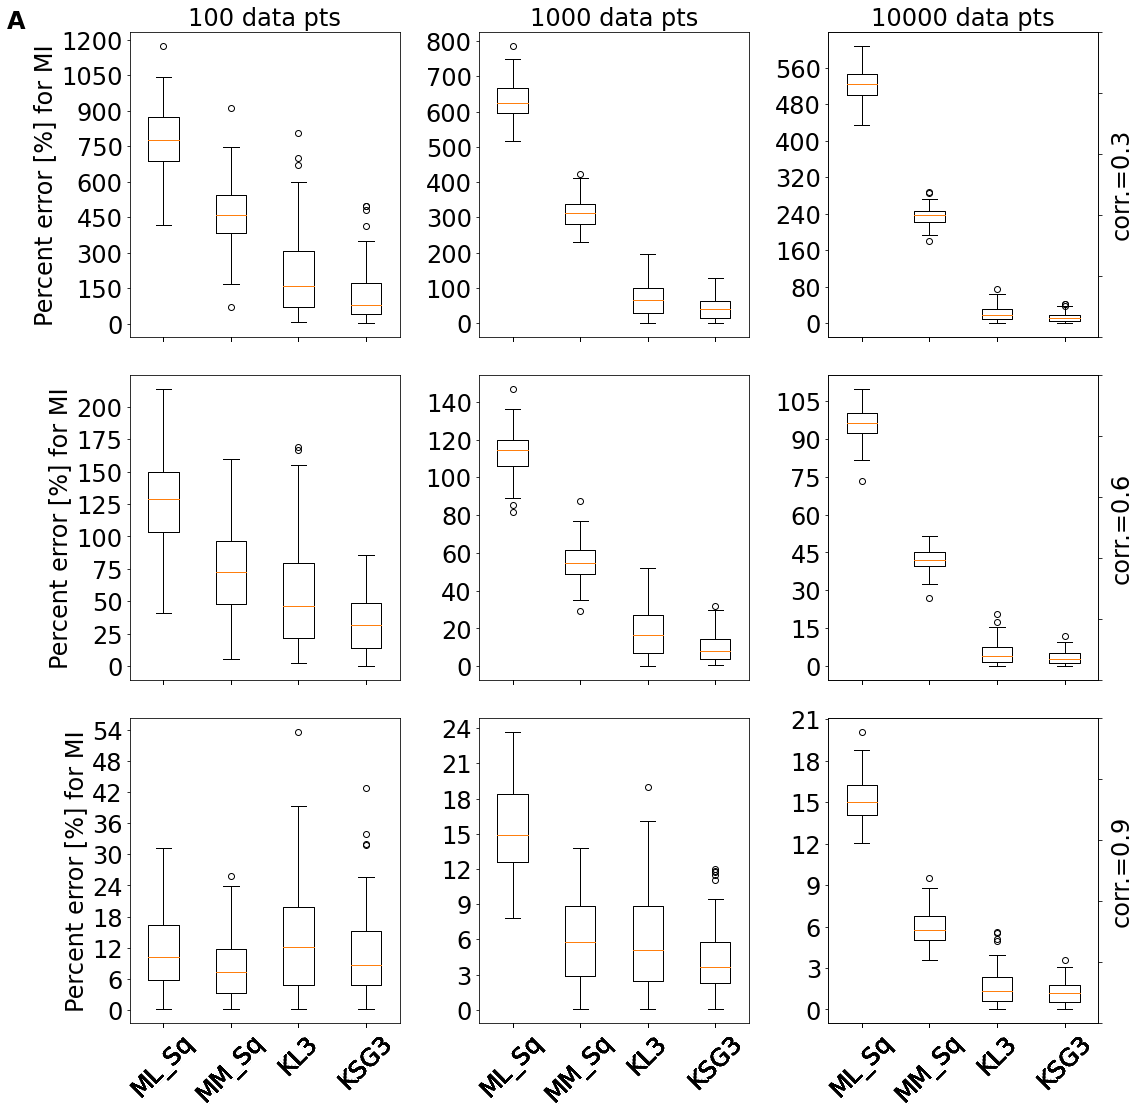

In [8]:
matplotlib.rcParams.update({"figure.figsize": (16,16)})

fig, ax = plt.subplots(3,3, sharex=True, sharey=False)

for c,correlation in enumerate(corr_list):
    for n,Ntot in enumerate(Ntot_list):
        Sturges_bins = math.ceil(np.log2(Ntot)) + 1
        #Sqrt_bins = math.ceil(Ntot**(1/2)) # old ver
        Sqrt_bins = math.floor(Ntot**(1/2)) # new ver
        analytical_sol = -1/2 * np.log(1-correlation**2)
        
        for iteration in range(iterations):
            percent_err_array_bins_sqrt[c,n,iteration] = abs(analytical_sol - MI2_bins_4d_array[c,n,Sqrt_bins-2,iteration]) / analytical_sol * 100
            percent_err_array_bins_MM_sqrt[c,n,iteration] = abs(analytical_sol - MI2_MM_bins_4d_array[c,n,Sqrt_bins-2,iteration]) / analytical_sol * 100
            percent_err_array_knn_KL[c,n,iteration] = abs(analytical_sol - MI2_knn_KL_4d_array[c,n,k-1,iteration]) / analytical_sol * 100
            percent_err_array_knn_KSG[c,n,iteration] = abs(analytical_sol - MI2_knn_KSG_4d_array[c,n,k-1,iteration]) / analytical_sol * 100

        ax[c][n].boxplot([percent_err_array_bins_sqrt[c,n,:],percent_err_array_bins_MM_sqrt[c,n,:],percent_err_array_knn_KL[c,n,:],percent_err_array_knn_KSG[c,n,:]],labels=['ML_Sq','MM_Sq','KL3','KSG3'])

        ax[c][n].yaxis.set_major_locator(MaxNLocator(integer=True))
        #plt.xlabel('Number of bins [#]')
        #plt.title('%i data pts, corr.=%.1f' %(Ntot,correlation))
        ax[0][n].set_title('%i data pts' %Ntot)
        ax[2][n].tick_params(axis='x',labelrotation=45) ### x axis labels rotation
        #ax[c][n].legend(['corr.=%.1f' %correlation])
        #plt.legend()
    ax[c][0].set_ylabel('Percent error [%] for MI'); #plt.ylim(0,1)
    second_y_axis_label = ax[c][n].twinx()
    second_y_axis_label.set_ylabel('corr.=%.1f' %correlation)
    second_y_axis_label.set_yticklabels([])
    
    # Force y-tick labels to be integers
    ax[c][n].yaxis.set_major_locator(MaxNLocator(integer=True))
    
plt.tight_layout()

plt.figtext(0.0,0.975,"A", {'ha':'left','va':'top','fontsize':24, 'fontweight':'bold'})

plt.savefig('Figure2A_MI_analytical_FB_vs_kNN.pdf', dpi = 300, bbox_inches='tight')

In [9]:
### FIGURE 2B - TC boxplots

In [10]:
# Loading data
dict_name= 'TC_bins_4d_array'
matfile = '/home/lshacha1/DATA/MI_comparison_FB_vs_KNN/' + dict_name + '.mat'
matdata = scipy.io.loadmat(matfile)
TC_bins_4d_array = matdata[dict_name]
#print(matfile,"file loaded")

dict_name= 'TC_MM_bins_4d_array'
matfile = '/home/lshacha1/DATA/MI_comparison_FB_vs_KNN/' + dict_name + '.mat'
matdata = scipy.io.loadmat(matfile)
TC_MM_bins_4d_array = matdata[dict_name]
#print(matfile,"file loaded")

dict_name= 'TC_knn_KL_4d_array'
matfile = '/home/lshacha1/DATA/MI_comparison_FB_vs_KNN/' + dict_name + '.mat'
matdata = scipy.io.loadmat(matfile)
TC_knn_KL_4d_array = matdata[dict_name]
#print(matfile,"file loaded")

dict_name= 'TC_knn_KSG_4d_array'
matfile = '/home/lshacha1/DATA/MI_comparison_FB_vs_KNN/' + dict_name + '.mat'
matdata = scipy.io.loadmat(matfile)
TC_knn_KSG_4d_array = matdata[dict_name]
#print(matfile,"file loaded")

In [11]:
# Initialization 
corr_list = [0.3, 0.6, 0.9]
Ntot_list = [100,1000,10000]
iterations = 100 # test # better to do 500-1000
k = 3
percent_err_array_bins_sqrt = np.zeros((len(corr_list),len(Ntot_list),iterations),dtype=float)
percent_err_array_bins_MM_sqrt = np.zeros((len(corr_list),len(Ntot_list),iterations),dtype=float)
percent_err_array_knn_KL = np.zeros((len(corr_list),len(Ntot_list),iterations),dtype=float)
percent_err_array_knn_KSG = np.zeros((len(corr_list),len(Ntot_list),iterations),dtype=float)

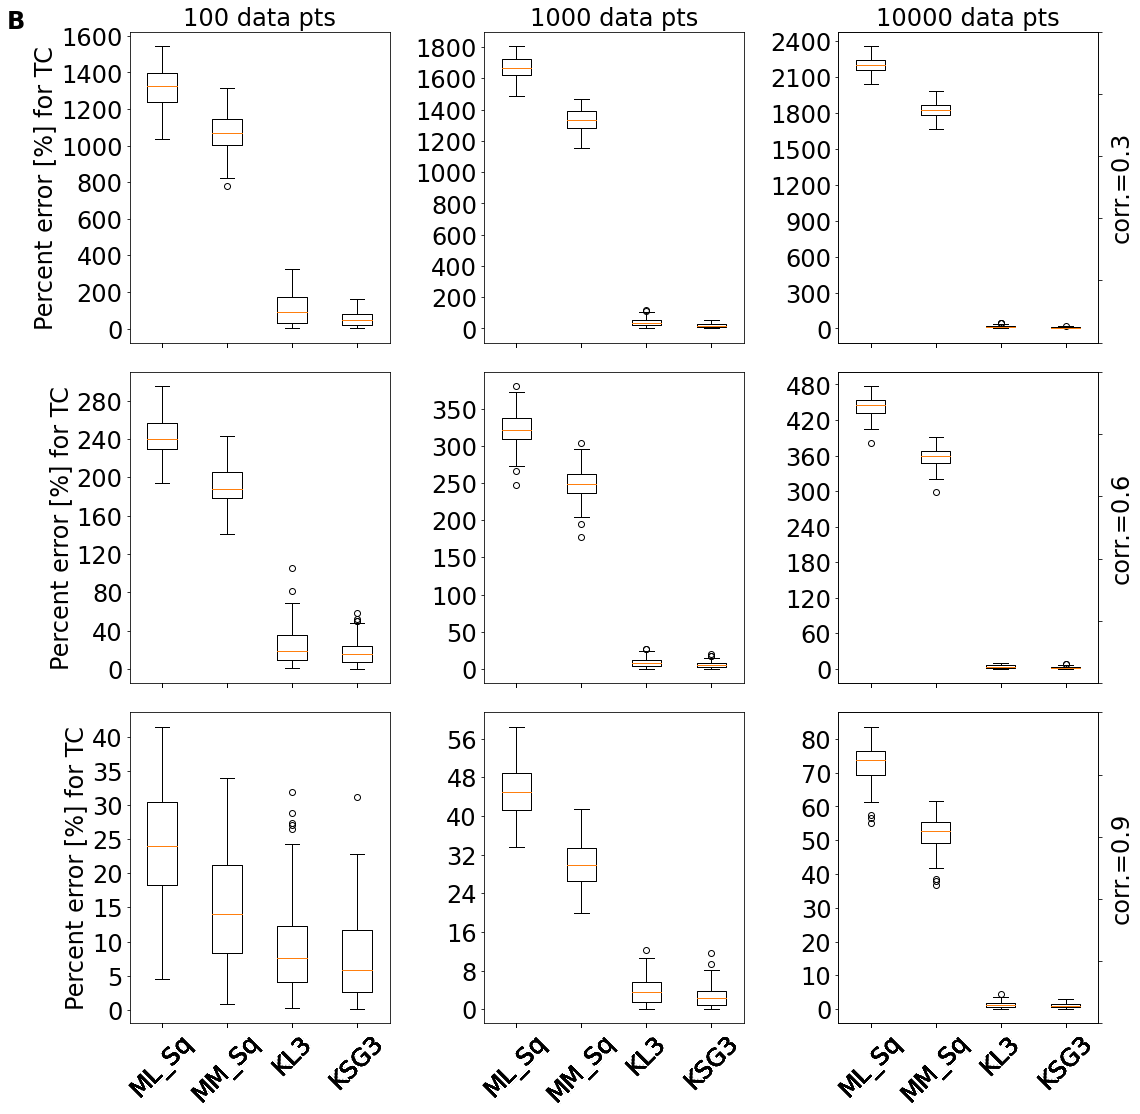

In [12]:
matplotlib.rcParams.update({"figure.figsize": (16,16)})

fig, ax = plt.subplots(3,3, sharex=True, sharey=False)

for c,correlation in enumerate(corr_list):
    for n,Ntot in enumerate(Ntot_list):
        Sturges_bins = math.ceil(np.log2(Ntot)) + 1
        #Sqrt_bins = math.ceil(Ntot**(1/2)) # old ver
        Sqrt_bins = math.floor(Ntot**(1/2))
        TC_analytical_sol = -1/2 * np.log(1 - 3*correlation**2 + 2*correlation**3)
        
        for iteration in range(iterations):
            percent_err_array_bins_sqrt[c,n,iteration] = abs(TC_analytical_sol - TC_bins_4d_array[c,n,Sqrt_bins-2,iteration]) / TC_analytical_sol * 100
            percent_err_array_bins_MM_sqrt[c,n,iteration] = abs(TC_analytical_sol - TC_MM_bins_4d_array[c,n,Sqrt_bins-2,iteration]) / TC_analytical_sol * 100
            percent_err_array_knn_KL[c,n,iteration] = abs(TC_analytical_sol - TC_knn_KL_4d_array[c,n,k-1,iteration]) / TC_analytical_sol * 100
            percent_err_array_knn_KSG[c,n,iteration] = abs(TC_analytical_sol - TC_knn_KSG_4d_array[c,n,k-1,iteration]) / TC_analytical_sol * 100
        
        ax[c][n].boxplot([percent_err_array_bins_sqrt[c,n,:],percent_err_array_bins_MM_sqrt[c,n,:],percent_err_array_knn_KL[c,n,:],percent_err_array_knn_KSG[c,n,:]],labels=['ML_Sq','MM_Sq','KL3','KSG3'])
        ax[c][n].yaxis.set_major_locator(MaxNLocator(integer=True))
        #plt.xlabel('Number of bins [#]')
        #plt.title('%i data pts, corr.=%.1f' %(Ntot,correlation))
        ax[0][n].set_title('%i data pts' %Ntot)
        ax[2][n].tick_params(axis='x',labelrotation=45) ### x axis labels rotation
        #ax[c][n].legend(['corr.=%.1f' %correlation])
        #plt.legend()
    ax[c][0].set_ylabel('Percent error [%] for TC'); #plt.ylim(0,1)
    second_y_axis_label = ax[c][n].twinx()
    second_y_axis_label.set_ylabel('corr.=%.1f' %correlation)
    second_y_axis_label.set_yticklabels([])
    
    # Force y-tick labels to be integers
    ax[c][n].yaxis.set_major_locator(MaxNLocator(integer=True))
    
plt.tight_layout()

plt.figtext(0.0,0.975,"B", {'ha':'left','va':'top','fontsize':24, 'fontweight':'bold'})

plt.savefig('Figure2B_TC_analytical_FB_vs_kNN.pdf', dpi=300, bbox_inches='tight')

In [13]:
### SI figures: S1

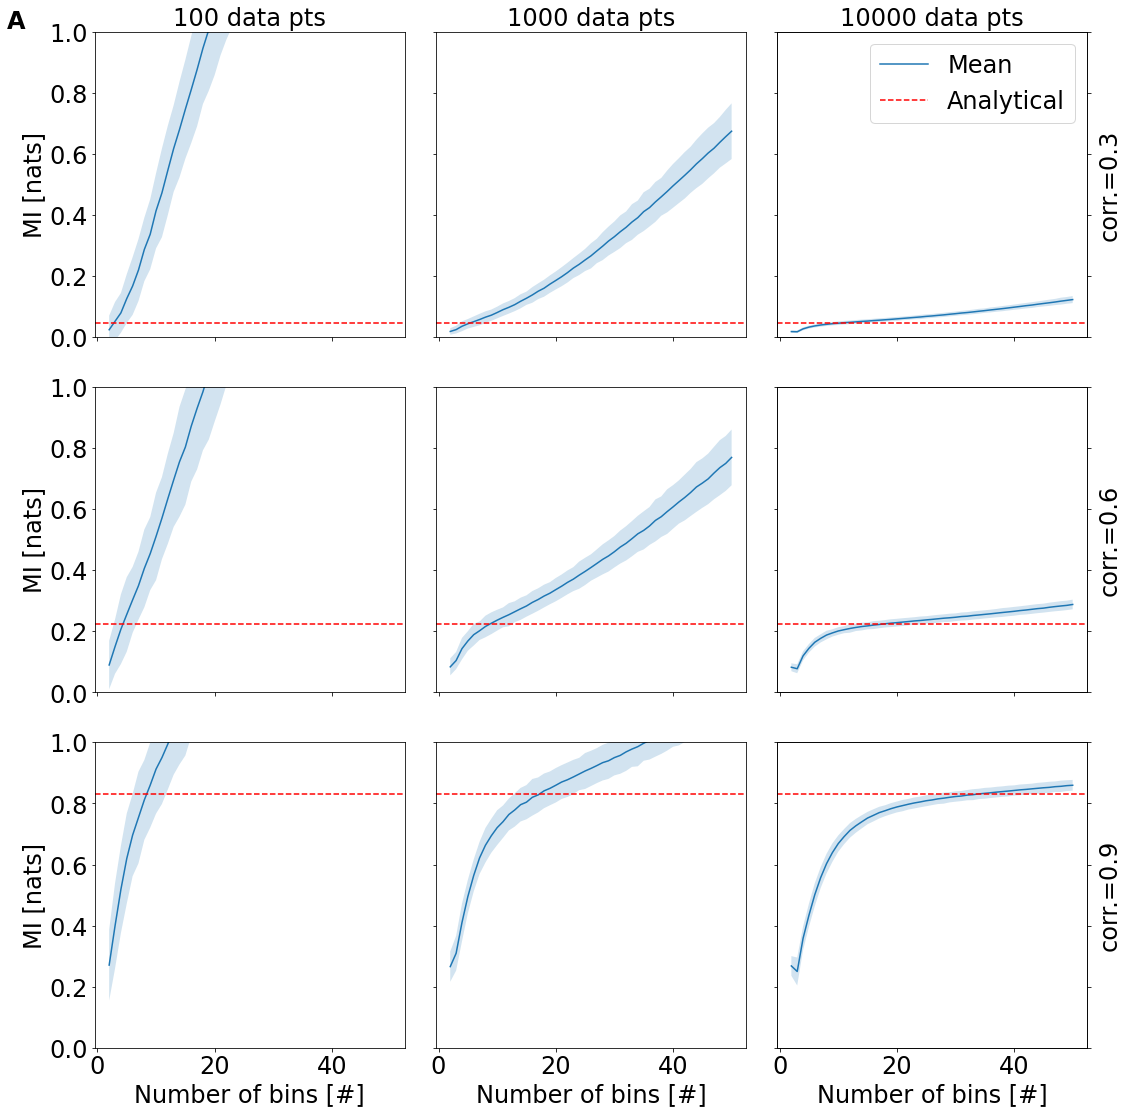

In [14]:
### MI2 with FB - ver2
matplotlib.rcParams.update({"figure.figsize": (16,16)})

fig, ax = plt.subplots(3,3, sharex=True, sharey=True)

# Constants for plotting
max_num_of_bins = 51 #101 

for c,correlation in enumerate(corr_list):
    for n,Ntot in enumerate(Ntot_list):
        # Plotting the mean MI per number of bins among 100 iterations
        x_data = np.linspace(2,max_num_of_bins-1,max_num_of_bins-2)
        MI2_mean = MI2_bins_4d_array[c,n,:max_num_of_bins-2,:].mean(axis=1)
        MI2_std = MI2_bins_4d_array[c,n,:max_num_of_bins-2,:].std(axis=1)
        ax[c][n].plot(x_data, MI2_mean, label='Mean')
        # Fill between the mean +/- 3*std MI per number of bins among 100 iterations
        ax[c][n].fill_between(x_data, MI2_mean + 2 * MI2_std, MI2_mean - 2 * MI2_std, alpha=0.2)
        # Fill between the [min,max] MI per number of bins among 100 iterations
        #ax[c][n].fill_between(x_data, MI2_bins_4d_array[c,n,:max_num_of_bins-2,:].max(axis=1), MI2_bins_4d_array[c,n,:max_num_of_bins-2,:].min(axis=1), alpha=0.2)

        ax[c][n].axhline(y=-1/2 * np.log(1-correlation**2), color='r', linestyle='--', label='Analytical')
        ax[2][n].set_xlabel('Number of bins [#]')
        ax[0][n].set_title('%i data pts' %Ntot)
        #ax[c][n].legend()
        
    ax[c][0].set_ylabel('MI [nats]'); ax[c][0].set_ylim(0,1)
    second_y_axis_label = ax[c][n].twinx()
    second_y_axis_label.set_ylabel('corr.=%.1f' %correlation)
    second_y_axis_label.set_yticklabels([])

ax[0][2].legend()

plt.tight_layout()

plt.figtext(0.01,0.975,"A", {'ha':'left','va':'top','fontsize':24, 'fontweight':'bold'})

plt.savefig('FigureS1A_MI_analytical_FB.pdf',dpi = 300, bbox_inches='tight')

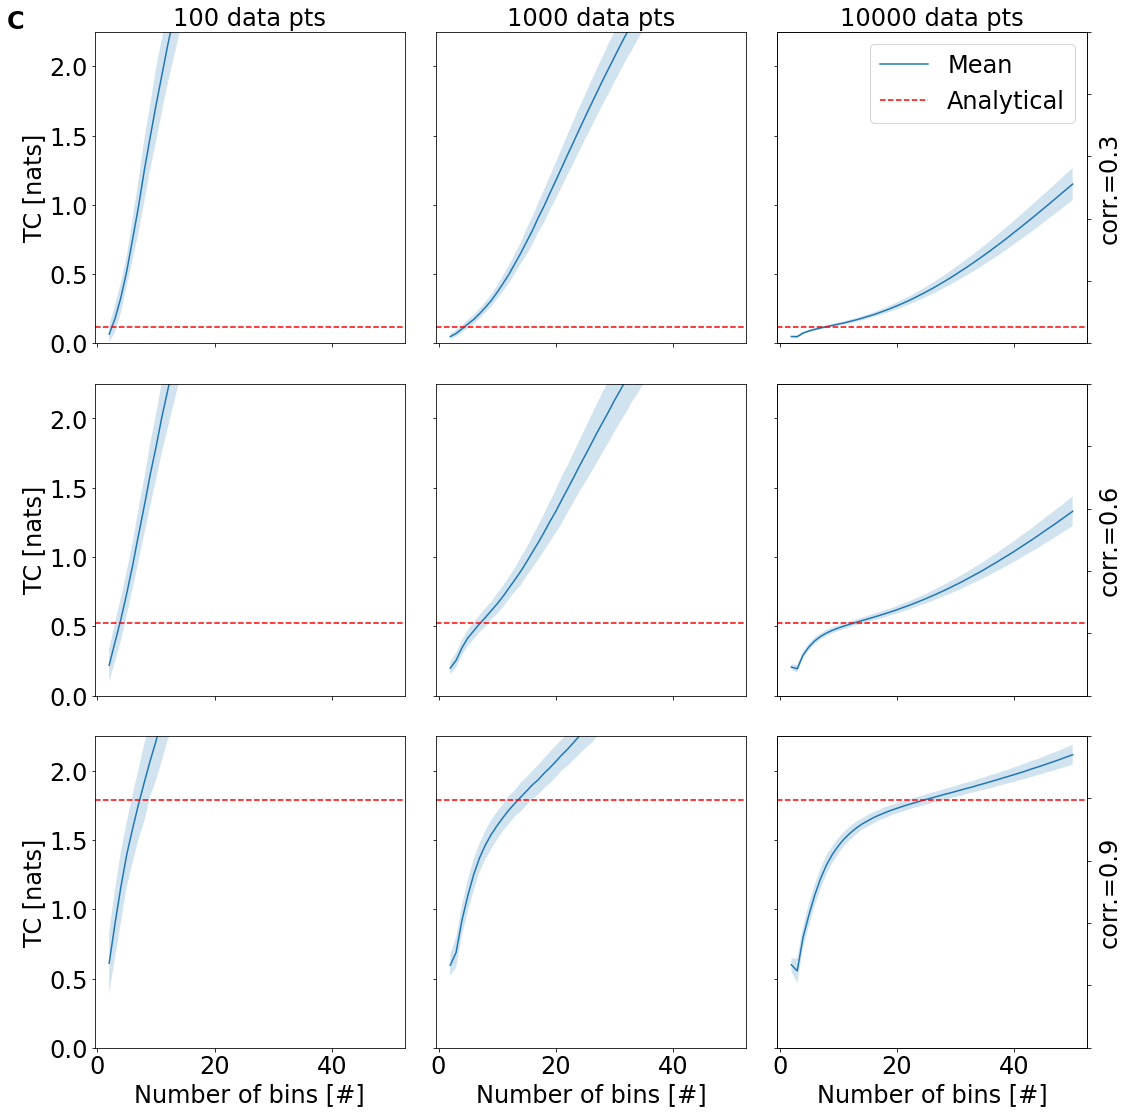

In [15]:
### TC with FB - ver2
matplotlib.rcParams.update({"figure.figsize": (16,16)})

fig, ax = plt.subplots(3,3, sharex=True, sharey=True)

for c,correlation in enumerate(corr_list):
    for n,Ntot in enumerate(Ntot_list):
        # Plotting the mean MI per number of bins among 100 iterations
        x_data = np.linspace(2,max_num_of_bins-1,max_num_of_bins-2)
        TC_mean = TC_bins_4d_array[c,n,:max_num_of_bins-2,:].mean(axis=1)
        TC_std = TC_bins_4d_array[c,n,:max_num_of_bins-2,:].std(axis=1)
        ax[c][n].plot(x_data, TC_mean, label='Mean')
        # Fill between the mean +/- 3*std MI per number of bins among 100 iterations
        ax[c][n].fill_between(x_data, TC_mean + 2 * TC_std, TC_mean - 2 * TC_std, alpha=0.2)
        # Fill between the [min,max] MI per number of bins among 100 iterations
        #ax[c][n].fill_between(x_data, TC_bins_4d_array[c,n,:max_num_of_bins-2,:].max(axis=1), TC_bins_4d_array[c,n,:max_num_of_bins-2,:].min(axis=1), alpha=0.2)

        ax[c][n].axhline(y= -1/2 * np.log(1 - 3*correlation**2 + 2*correlation**3), color='r', linestyle='--', label='Analytical')
        ax[2][n].set_xlabel('Number of bins [#]')
        ax[0][n].set_title('%i data pts' %Ntot)
        #ax[c][n].legend()
        
    ax[c][0].set_ylabel('TC [nats]'); ax[c][0].set_ylim(0,2.25)
    second_y_axis_label = ax[c][n].twinx()
    second_y_axis_label.set_ylabel('corr.=%.1f' %correlation)
    second_y_axis_label.set_yticklabels([])

ax[0][2].legend()

plt.tight_layout()

plt.figtext(0.01,0.975,"C", {'ha':'left','va':'top','fontsize':24, 'fontweight':'bold'})

plt.savefig('FigureS1C_TC_analytical_FB.pdf',dpi=300, bbox_inches='tight')

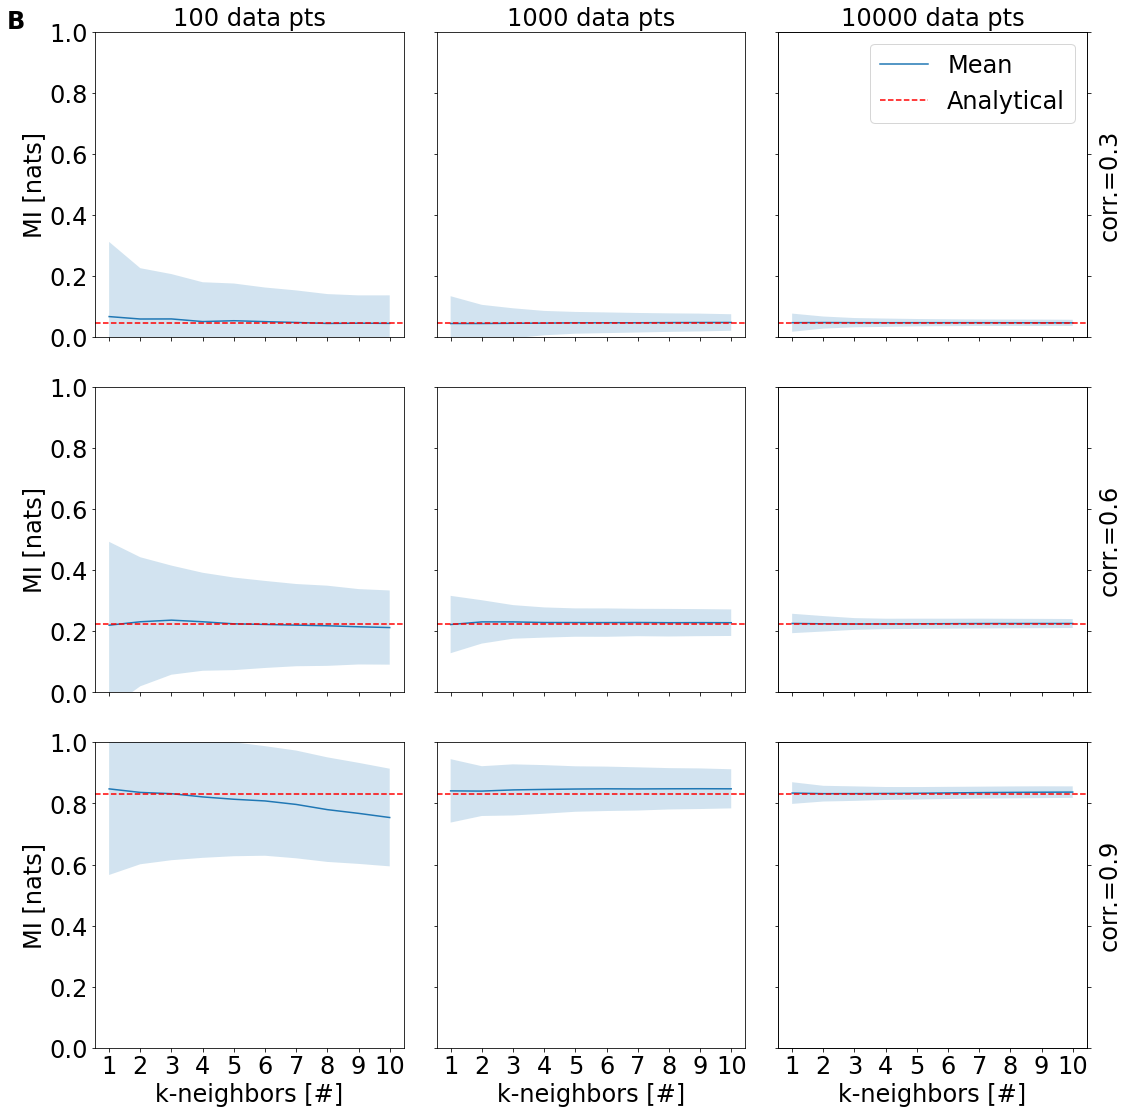

In [16]:
### Plotting
matplotlib.rcParams.update({"figure.figsize": (16,16)})

K_max = MI2_knn_KSG_4d_array.shape[2]
iterations = MI2_knn_KSG_4d_array.shape[-1]

fig, ax = plt.subplots(3,3, sharex=True, sharey=True)

for c,correlation in enumerate(corr_list):
    for n,Ntot in enumerate(Ntot_list):
        # Plotting the mean MI per number of bins among 100 iterations
        x_data = np.linspace(1,K_max,K_max)
        MI2_mean = MI2_knn_KSG_4d_array[c,n,:max_num_of_bins-2,:].mean(axis=1)
        MI2_std = MI2_knn_KSG_4d_array[c,n,:max_num_of_bins-2,:].std(axis=1)
        ax[c][n].plot(x_data, MI2_mean, label='Mean')
        # Fill between the mean +/- 3*std MI per number of bins among 100 iterations
        ax[c][n].fill_between(x_data, MI2_mean + 2 * MI2_std, MI2_mean - 2 * MI2_std, alpha=0.2)
        # Fill between the [min,max] MI per number of bins among 100 iterations
        #ax[c][n].fill_between(x_data, MI2_bins_4d_array[c,n,:max_num_of_bins-2,:].max(axis=1), MI2_bins_4d_array[c,n,:max_num_of_bins-2,:].min(axis=1), alpha=0.2)

        ax[c][n].axhline(y=-1/2 * np.log(1-correlation**2), color='r', linestyle='--', label='Analytical')
        ax[2][n].set_xlabel('k-neighbors [#]')
        ax[0][n].set_title('%i data pts' %Ntot)
        #ax[c][n].legend()
        
    ax[c][0].set_ylabel('MI [nats]'); ax[c][0].set_ylim(0,1)
    second_y_axis_label = ax[c][n].twinx()
    second_y_axis_label.set_ylabel('corr.=%.1f' %correlation)
    second_y_axis_label.set_yticklabels([])
    
    # Force x-tick labels to be integers
    ax[c][n].xaxis.set_major_locator(MaxNLocator(integer=True))
    
ax[0][2].legend()

plt.tight_layout()

plt.figtext(0.01,0.975,"B", {'ha':'left','va':'top','fontsize':24, 'fontweight':'bold'})

plt.savefig('FigureS1B_MI_analytical_kNN.pdf',dpi=300, bbox_inches='tight')

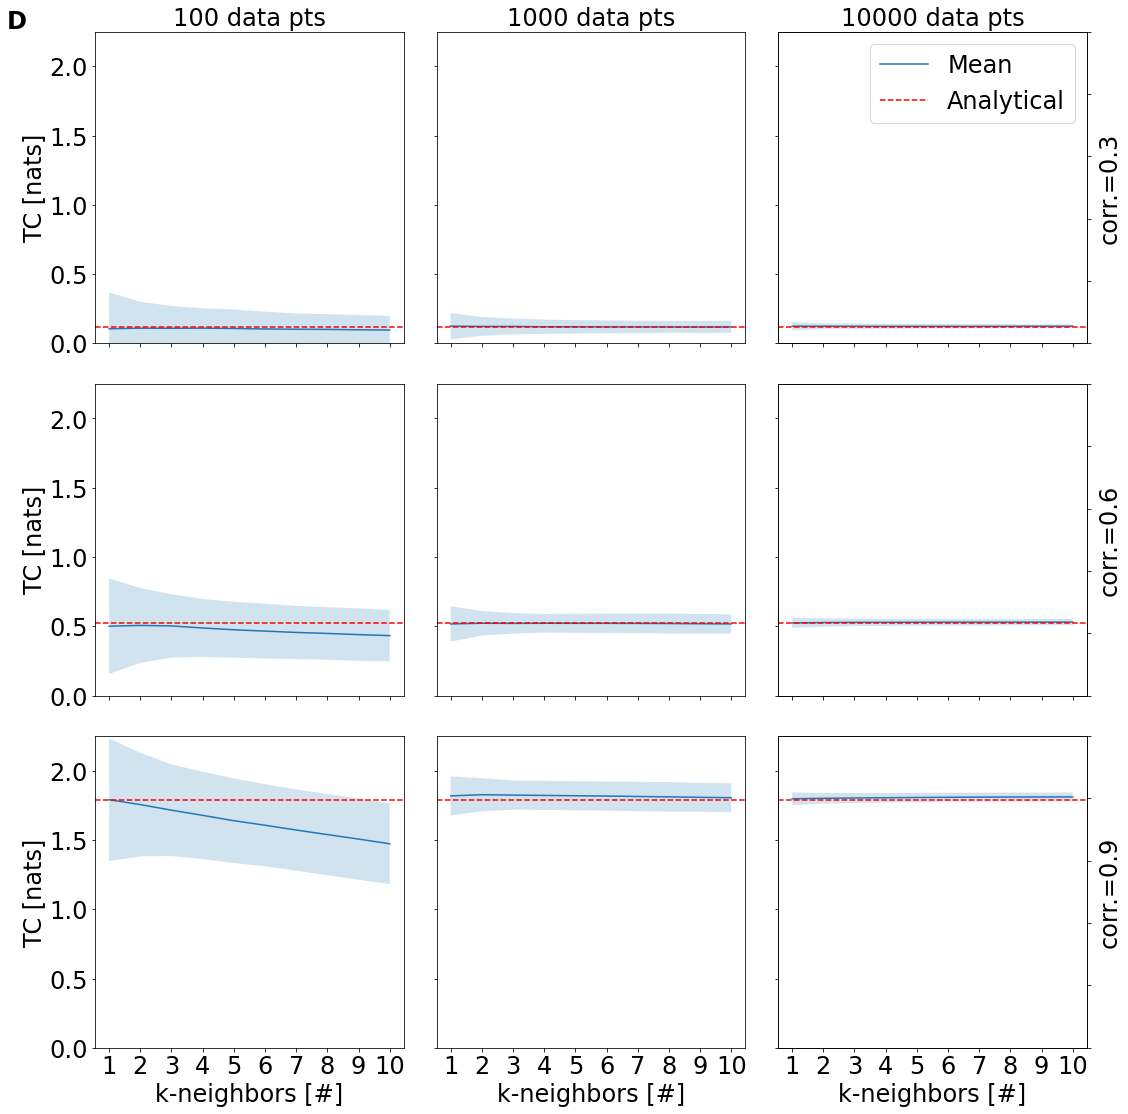

In [17]:
### Plotting TC-KNN
matplotlib.rcParams.update({"figure.figsize": (16,16)})

K_max = TC_knn_KSG_4d_array.shape[2]
iterations = TC_knn_KSG_4d_array.shape[-1] 

fig, ax = plt.subplots(3,3, sharex=True, sharey=True)

for c,correlation in enumerate(corr_list):
    for n,Ntot in enumerate(Ntot_list):
        # Plotting the mean MI per number of bins among 100 iterations
        x_data = np.linspace(1,K_max,K_max)
        TC_mean = TC_knn_KSG_4d_array[c,n,:max_num_of_bins-2,:].mean(axis=1)
        TC_std = TC_knn_KSG_4d_array[c,n,:max_num_of_bins-2,:].std(axis=1)
        ax[c][n].plot(x_data, TC_mean, label='Mean')
        # Fill between the mean +/- 3*std MI per number of bins among 100 iterations
        ax[c][n].fill_between(x_data, TC_mean + 2 * TC_std, TC_mean - 2 * TC_std, alpha=0.2)
        # Fill between the [min,max] MI per number of bins among 100 iterations
        #ax[c][n].fill_between(x_data, TC_bins_4d_array[c,n,:max_num_of_bins-2,:].max(axis=1), TC_bins_4d_array[c,n,:max_num_of_bins-2,:].min(axis=1), alpha=0.2)

        ax[c][n].axhline(y= -1/2 * np.log(1 - 3*correlation**2 + 2*correlation**3), color='r', linestyle='--', label='Analytical')
        ax[2][n].set_xlabel('k-neighbors [#]')
        ax[0][n].set_title('%i data pts' %Ntot)
        #ax[c][n].legend()
        
    ax[c][0].set_ylabel('TC [nats]'); ax[c][0].set_ylim(0,2.25)
    second_y_axis_label = ax[c][n].twinx()
    second_y_axis_label.set_ylabel('corr.=%.1f' %correlation)
    second_y_axis_label.set_yticklabels([])
    
    # Force x-tick labels to be integers
    ax[c][n].xaxis.set_major_locator(MaxNLocator(integer=True))

ax[0][2].legend()

plt.tight_layout()

plt.figtext(0.01,0.975,"D", {'ha':'left','va':'top','fontsize':24, 'fontweight':'bold'})

plt.savefig('FigureS1D_TC_analytical_kNN.pdf',dpi=300, bbox_inches='tight')

In [18]:
### SI figures for: MI3, CMI, II

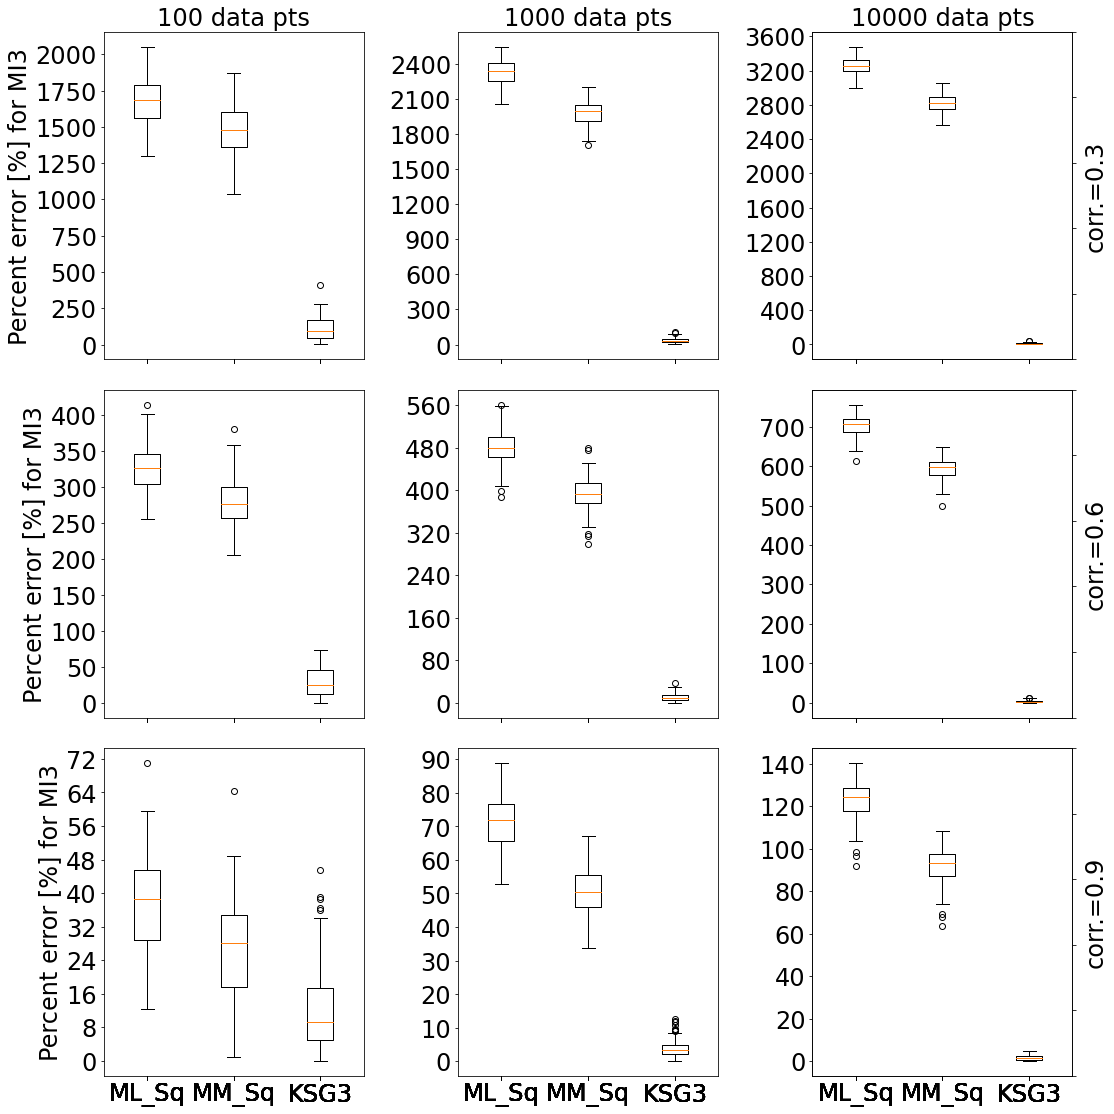

In [19]:
# Loading data
dict_name= 'MI3_bins_4d_array'
matfile = '/home/lshacha1/DATA/MI_comparison_FB_vs_KNN/' + dict_name + '.mat'
matdata = scipy.io.loadmat(matfile)
MI3_bins_4d_array = matdata[dict_name]
#print(matfile,"file loaded")

dict_name= 'MI3_MM_bins_4d_array'
matfile = '/home/lshacha1/DATA/MI_comparison_FB_vs_KNN/' + dict_name + '.mat'
matdata = scipy.io.loadmat(matfile)
MI3_MM_bins_4d_array = matdata[dict_name]
#print(matfile,"file loaded")

dict_name= 'MI3_knn_KSG_4d_array'
matfile = '/home/lshacha1/DATA/MI_comparison_FB_vs_KNN/' + dict_name + '.mat'
matdata = scipy.io.loadmat(matfile)
MI3_knn_KSG_4d_array = matdata[dict_name]
#print(matfile,"file loaded")

### Now with sqrt(N) instead of Sturges
fig, ax = plt.subplots(3,3, sharex=True, sharey=False)

for c,correlation in enumerate(corr_list):
    for n,Ntot in enumerate(Ntot_list):
        Sturges_bins = math.ceil(np.log2(Ntot)) + 1
        #Sqrt_bins = math.ceil(Ntot**(1/2)) # old ver
        Sqrt_bins = math.floor(Ntot**(1/2))
        MI3_analytical_sol = 1/2 * np.log(1-correlation**2) - 1/2 * np.log(1 - 3*correlation**2 + 2*correlation**3)
        
        for iteration in range(iterations):
            percent_err_array_bins_sqrt[c,n,iteration] = abs(MI3_analytical_sol - MI3_bins_4d_array[c,n,Sqrt_bins-2,iteration]) / MI3_analytical_sol * 100
            percent_err_array_bins_MM_sqrt[c,n,iteration] = abs(MI3_analytical_sol - MI3_MM_bins_4d_array[c,n,Sqrt_bins-2,iteration]) / MI3_analytical_sol * 100
            percent_err_array_knn_KSG[c,n,iteration] = abs(MI3_analytical_sol - MI3_knn_KSG_4d_array[c,n,k-1,iteration]) / MI3_analytical_sol * 100
        
        ax[c][n].boxplot([percent_err_array_bins_sqrt[c,n,:],percent_err_array_bins_MM_sqrt[c,n,:],percent_err_array_knn_KSG[c,n,:]],labels=['ML_Sq','MM_Sq','KSG3'])
        ax[c][n].yaxis.set_major_locator(MaxNLocator(integer=True))
        #plt.xlabel('Number of bins [#]')
        #plt.title('%i data pts, corr.=%.1f' %(Ntot,correlation))
        ax[0][n].set_title('%i data pts' %Ntot)
        #ax[c][n].legend(['corr.=%.1f' %correlation])
        #plt.legend()
    ax[c][0].set_ylabel('Percent error [%] for MI3'); #plt.ylim(0,1)
    second_y_axis_label = ax[c][n].twinx()
    second_y_axis_label.set_ylabel('corr.=%.1f' %correlation)
    second_y_axis_label.set_yticklabels([])
    
    # Force y-tick labels to be integers
    ax[c][n].yaxis.set_major_locator(MaxNLocator(integer=True))
    
plt.tight_layout()

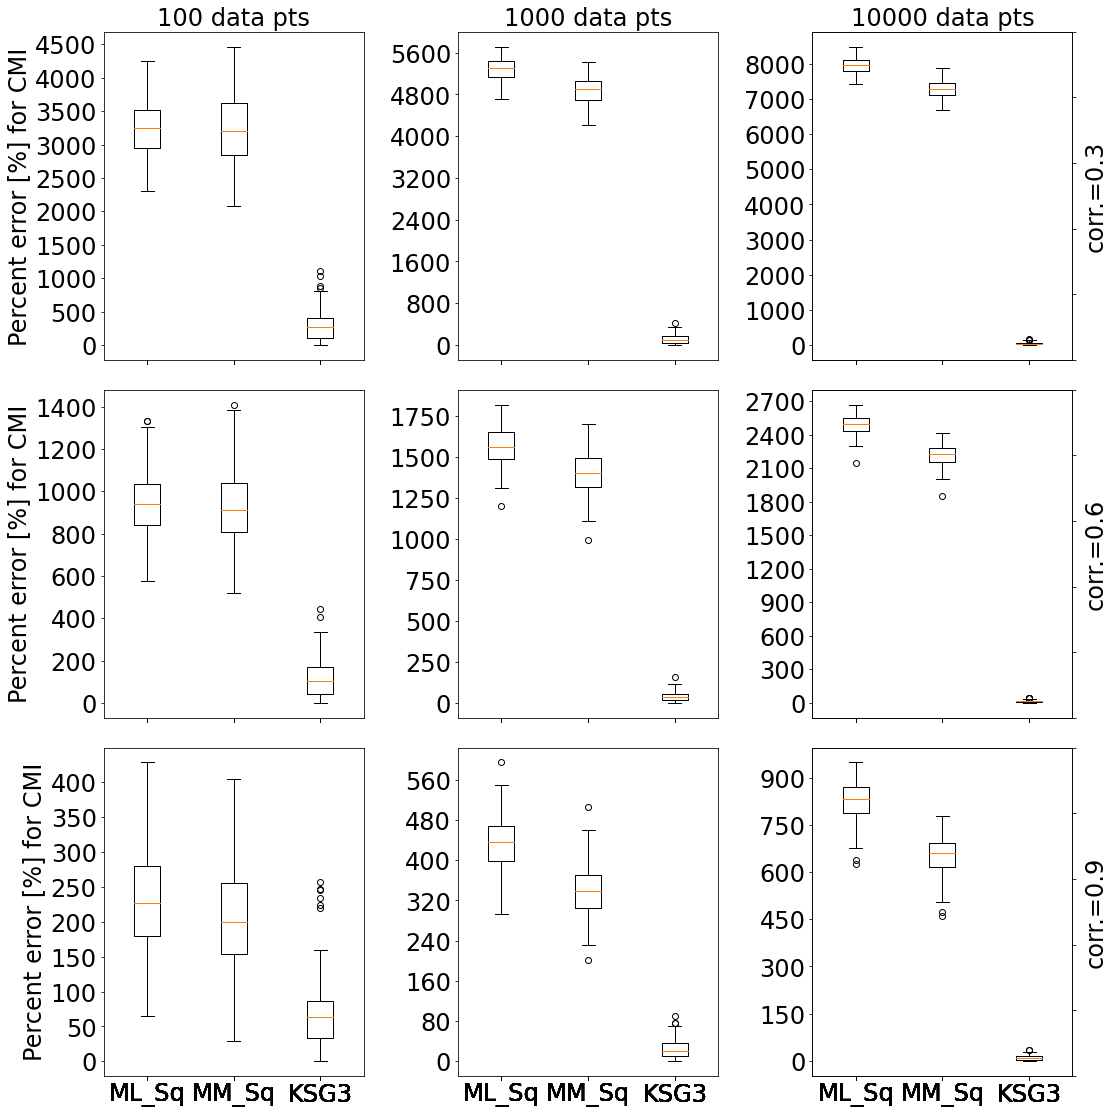

In [20]:
# Loading data
dict_name= 'CMI_bins_4d_array'
matfile = '/home/lshacha1/DATA/MI_comparison_FB_vs_KNN/' + dict_name + '.mat'
matdata = scipy.io.loadmat(matfile)
CMI_bins_4d_array = matdata[dict_name]
#print(matfile,"file loaded")

dict_name= 'CMI_MM_bins_4d_array'
matfile = '/home/lshacha1/DATA/MI_comparison_FB_vs_KNN/' + dict_name + '.mat'
matdata = scipy.io.loadmat(matfile)
CMI_MM_bins_4d_array = matdata[dict_name]
#print(matfile,"file loaded")

dict_name= 'CMI_knn_KSG_4d_array'
matfile = '/home/lshacha1/DATA/MI_comparison_FB_vs_KNN/' + dict_name + '.mat'
matdata = scipy.io.loadmat(matfile)
CMI_knn_KSG_4d_array = matdata[dict_name]
#print(matfile,"file loaded")

### Now with sqrt(N) instead of Sturges
fig, ax = plt.subplots(3,3, sharex=True, sharey=False)

for c,correlation in enumerate(corr_list):
    for n,Ntot in enumerate(Ntot_list):
        Sturges_bins = math.ceil(np.log2(Ntot)) + 1
        #Sqrt_bins = math.ceil(Ntot**(1/2)) # old ver
        Sqrt_bins = math.floor(Ntot**(1/2))
        CMI_analytical_sol = np.log(1-correlation**2) - 1/2 * np.log(1 - 3*correlation**2 + 2*correlation**3)
        
        for iteration in range(iterations):
            percent_err_array_bins_sqrt[c,n,iteration] = abs(CMI_analytical_sol - CMI_bins_4d_array[c,n,Sqrt_bins-2,iteration]) / CMI_analytical_sol * 100
            percent_err_array_bins_MM_sqrt[c,n,iteration] = abs(CMI_analytical_sol - CMI_MM_bins_4d_array[c,n,Sqrt_bins-2,iteration]) / CMI_analytical_sol * 100
            percent_err_array_knn_KSG[c,n,iteration] = abs(CMI_analytical_sol - CMI_knn_KSG_4d_array[c,n,k-1,iteration]) / CMI_analytical_sol * 100
        
        ax[c][n].boxplot([percent_err_array_bins_sqrt[c,n,:],percent_err_array_bins_MM_sqrt[c,n,:],percent_err_array_knn_KSG[c,n,:]],labels=['ML_Sq','MM_Sq','KSG3'])
        ax[c][n].yaxis.set_major_locator(MaxNLocator(integer=True))
        #plt.xlabel('Number of bins [#]')
        #plt.title('%i data pts, corr.=%.1f' %(Ntot,correlation))
        ax[0][n].set_title('%i data pts' %Ntot)
        #ax[c][n].legend(['corr.=%.1f' %correlation])
        #plt.legend()
    ax[c][0].set_ylabel('Percent error [%] for CMI'); #plt.ylim(0,1)
    second_y_axis_label = ax[c][n].twinx()
    second_y_axis_label.set_ylabel('corr.=%.1f' %correlation)
    second_y_axis_label.set_yticklabels([])
    
    # Force y-tick labels to be integers
    ax[c][n].yaxis.set_major_locator(MaxNLocator(integer=True))
    
plt.tight_layout()

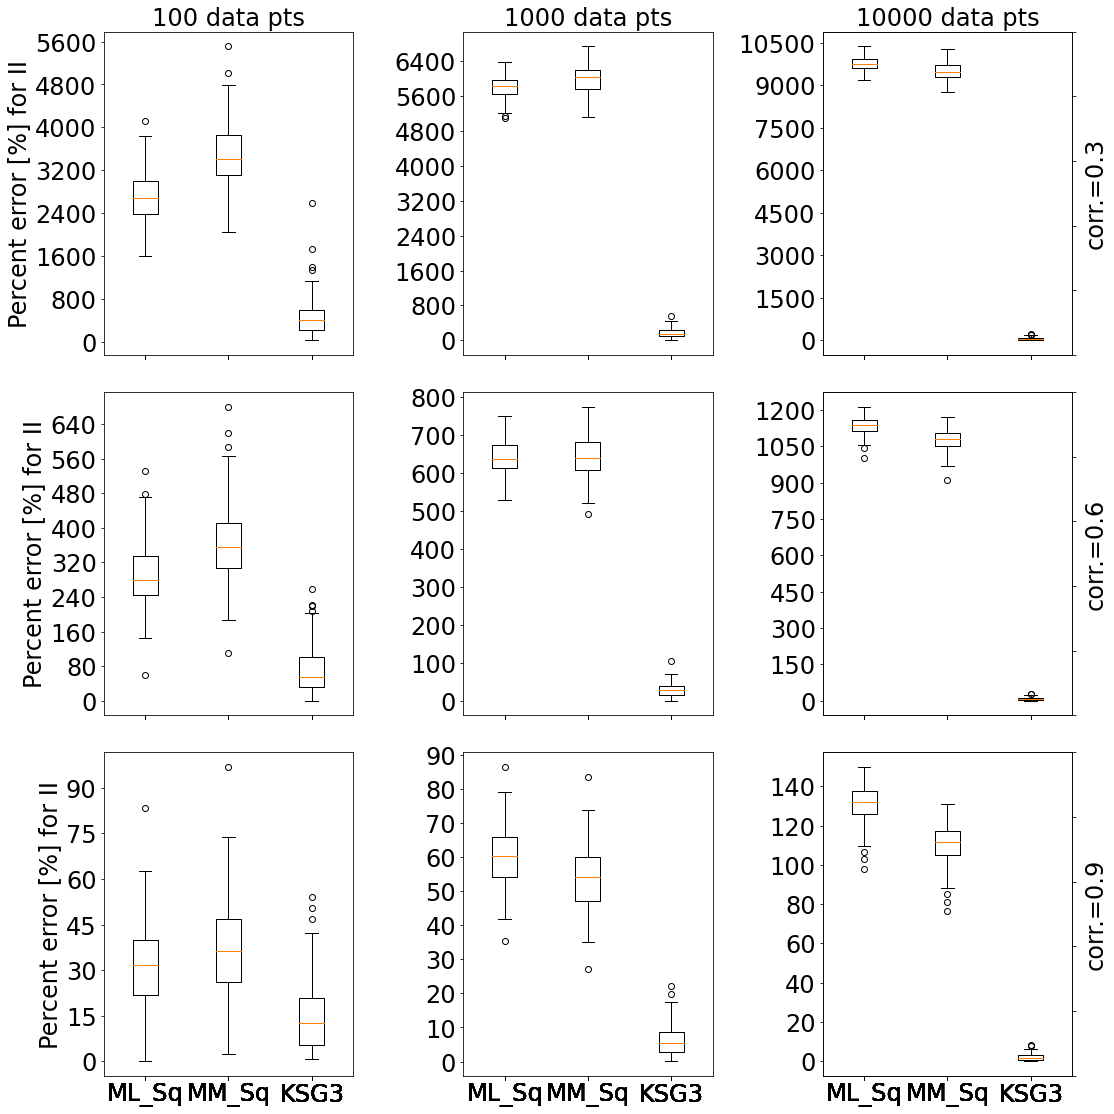

In [21]:
# Loading data
dict_name= 'II_bins_4d_array'
matfile = '/home/lshacha1/DATA/MI_comparison_FB_vs_KNN/' + dict_name + '.mat'
matdata = scipy.io.loadmat(matfile)
II_bins_4d_array = matdata[dict_name]
#print(matfile,"file loaded")

dict_name= 'II_MM_bins_4d_array'
matfile = '/home/lshacha1/DATA/MI_comparison_FB_vs_KNN/' + dict_name + '.mat'
matdata = scipy.io.loadmat(matfile)
II_MM_bins_4d_array = matdata[dict_name]
#print(matfile,"file loaded")

dict_name= 'II_knn_KSG_4d_array'
matfile = '/home/lshacha1/DATA/MI_comparison_FB_vs_KNN/' + dict_name + '.mat'
matdata = scipy.io.loadmat(matfile)
II_knn_KSG_4d_array = matdata[dict_name]
#print(matfile,"file loaded")

### Now with sqrt(N) instead of Sturges
fig, ax = plt.subplots(3,3, sharex=True, sharey=False)

for c,correlation in enumerate(corr_list):
    for n,Ntot in enumerate(Ntot_list):
        Sturges_bins = math.ceil(np.log2(Ntot)) + 1
        #Sqrt_bins = math.ceil(Ntot**(1/2)) # old ver
        Sqrt_bins = math.floor(Ntot**(1/2))
        II_analytical_sol = +3/2 * np.log(1-correlation**2) - 1/2 * np.log(1 - 3*correlation**2 + 2*correlation**3)
        
        for iteration in range(iterations):
            percent_err_array_bins_sqrt[c,n,iteration] = abs((II_analytical_sol - II_bins_4d_array[c,n,Sqrt_bins-2,iteration]) / II_analytical_sol) * 100
            percent_err_array_bins_MM_sqrt[c,n,iteration] = abs((II_analytical_sol - II_MM_bins_4d_array[c,n,Sqrt_bins-2,iteration]) / II_analytical_sol) * 100
            percent_err_array_knn_KSG[c,n,iteration] = abs((II_analytical_sol - II_knn_KSG_4d_array[c,n,k-1,iteration]) / II_analytical_sol) * 100
        
        ax[c][n].boxplot([percent_err_array_bins_sqrt[c,n,:],percent_err_array_bins_MM_sqrt[c,n,:],percent_err_array_knn_KSG[c,n,:]],labels=['ML_Sq','MM_Sq','KSG3'])
        ax[c][n].yaxis.set_major_locator(MaxNLocator(integer=True))
        #plt.xlabel('Number of bins [#]')
        #plt.title('%i data pts, corr.=%.1f' %(Ntot,correlation))
        ax[0][n].set_title('%i data pts' %Ntot)
        #ax[c][n].legend(['corr.=%.1f' %correlation])
        #plt.legend()
    ax[c][0].set_ylabel('Percent error [%] for II'); #plt.ylim(0,1)
    second_y_axis_label = ax[c][n].twinx()
    second_y_axis_label.set_ylabel('corr.=%.1f' %correlation)
    second_y_axis_label.set_yticklabels([])
    
    # Force y-tick labels to be integers
    ax[c][n].yaxis.set_major_locator(MaxNLocator(integer=True))
    
#ax[0][2].set_title("10k data pts") 
ax[0][2].ticklabel_format(style='plain', useOffset=False, axis='y')  

plt.tight_layout()

In [22]:
### Plotting MI2 => KL vs KSG for different k

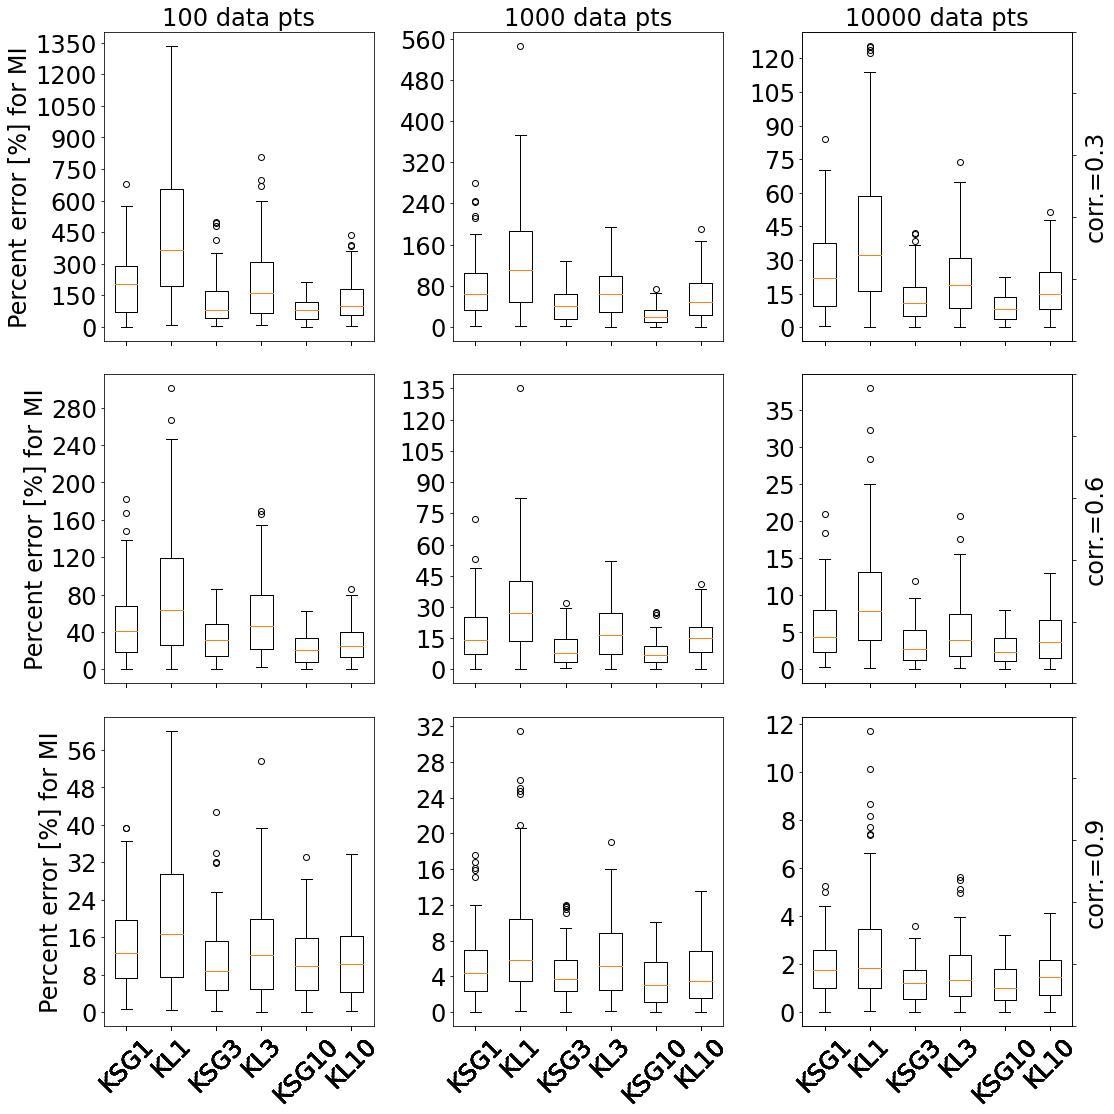

In [23]:
### Plotting Mi2
matplotlib.rcParams.update({"figure.figsize": (16,16)})
fig, ax = plt.subplots(3,3, sharex=True, sharey=False)

# Initialization 
percent_err_array_knn_KSG1 = np.zeros((len(corr_list),len(Ntot_list),iterations),dtype=float)
percent_err_array_knn_KSG3 = np.zeros((len(corr_list),len(Ntot_list),iterations),dtype=float)
percent_err_array_knn_KSG10 = np.zeros((len(corr_list),len(Ntot_list),iterations),dtype=float)
percent_err_array_knn_KL1 = np.zeros((len(corr_list),len(Ntot_list),iterations),dtype=float)
percent_err_array_knn_KL3 = np.zeros((len(corr_list),len(Ntot_list),iterations),dtype=float)
percent_err_array_knn_KL10 = np.zeros((len(corr_list),len(Ntot_list),iterations),dtype=float)

for c,correlation in enumerate(corr_list):
    for n,Ntot in enumerate(Ntot_list):
        MI2_analytical_sol = -1/2 * np.log(1-correlation**2)
        
        for iteration in range(iterations):
            k = 1
            percent_err_array_knn_KSG1[c,n,iteration] = abs(MI2_analytical_sol - MI2_knn_KSG_4d_array[c,n,k-1,iteration]) / MI2_analytical_sol * 100
            percent_err_array_knn_KL1[c,n,iteration] = abs(MI2_analytical_sol - MI2_knn_KL_4d_array[c,n,k-1,iteration]) / MI2_analytical_sol * 100
            k = 3
            percent_err_array_knn_KSG3[c,n,iteration] = abs(MI2_analytical_sol - MI2_knn_KSG_4d_array[c,n,k-1,iteration]) / MI2_analytical_sol * 100
            percent_err_array_knn_KL3[c,n,iteration] = abs(MI2_analytical_sol - MI2_knn_KL_4d_array[c,n,k-1,iteration]) / MI2_analytical_sol * 100
            k = 10
            percent_err_array_knn_KSG10[c,n,iteration] = abs(MI2_analytical_sol - MI2_knn_KSG_4d_array[c,n,k-1,iteration]) / MI2_analytical_sol * 100
            percent_err_array_knn_KL10[c,n,iteration] = abs(MI2_analytical_sol - MI2_knn_KL_4d_array[c,n,k-1,iteration]) / MI2_analytical_sol * 100

        ax[c][n].boxplot([percent_err_array_knn_KSG1[c,n,:],percent_err_array_knn_KL1[c,n,:],percent_err_array_knn_KSG3[c,n,:],percent_err_array_knn_KL3[c,n,:],percent_err_array_knn_KSG10[c,n,:],percent_err_array_knn_KL10[c,n,:]],labels=['KSG1','KL1','KSG3','KL3','KSG10','KL10'])
        #ax[c][n].violinplot([percent_err_array_knn_KSG1[c,n,:],percent_err_array_knn_KL1[c,n,:],percent_err_array_knn_KSG3[c,n,:],percent_err_array_knn_KL3[c,n,:],percent_err_array_knn_KSG10[c,n,:],percent_err_array_knn_KL10[c,n,:]])

        ax[c][n].yaxis.set_major_locator(MaxNLocator(integer=True))
        #plt.xlabel('Number of bins [#]')
        #plt.title('%i data pts, corr.=%.1f' %(Ntot,correlation))
        ax[0][n].set_title('%i data pts' %Ntot)
        ax[2][n].tick_params(axis='x',labelrotation=45)
        
    ax[c][0].set_ylabel('Percent error [%] for MI'); #plt.ylim(0,1)
    second_y_axis_label = ax[c][n].twinx()
    second_y_axis_label.set_ylabel('corr.=%.1f' %correlation)
    second_y_axis_label.set_yticklabels([])
            
plt.tight_layout()

In [24]:
### Plotting TC => KL vs KSG for different k

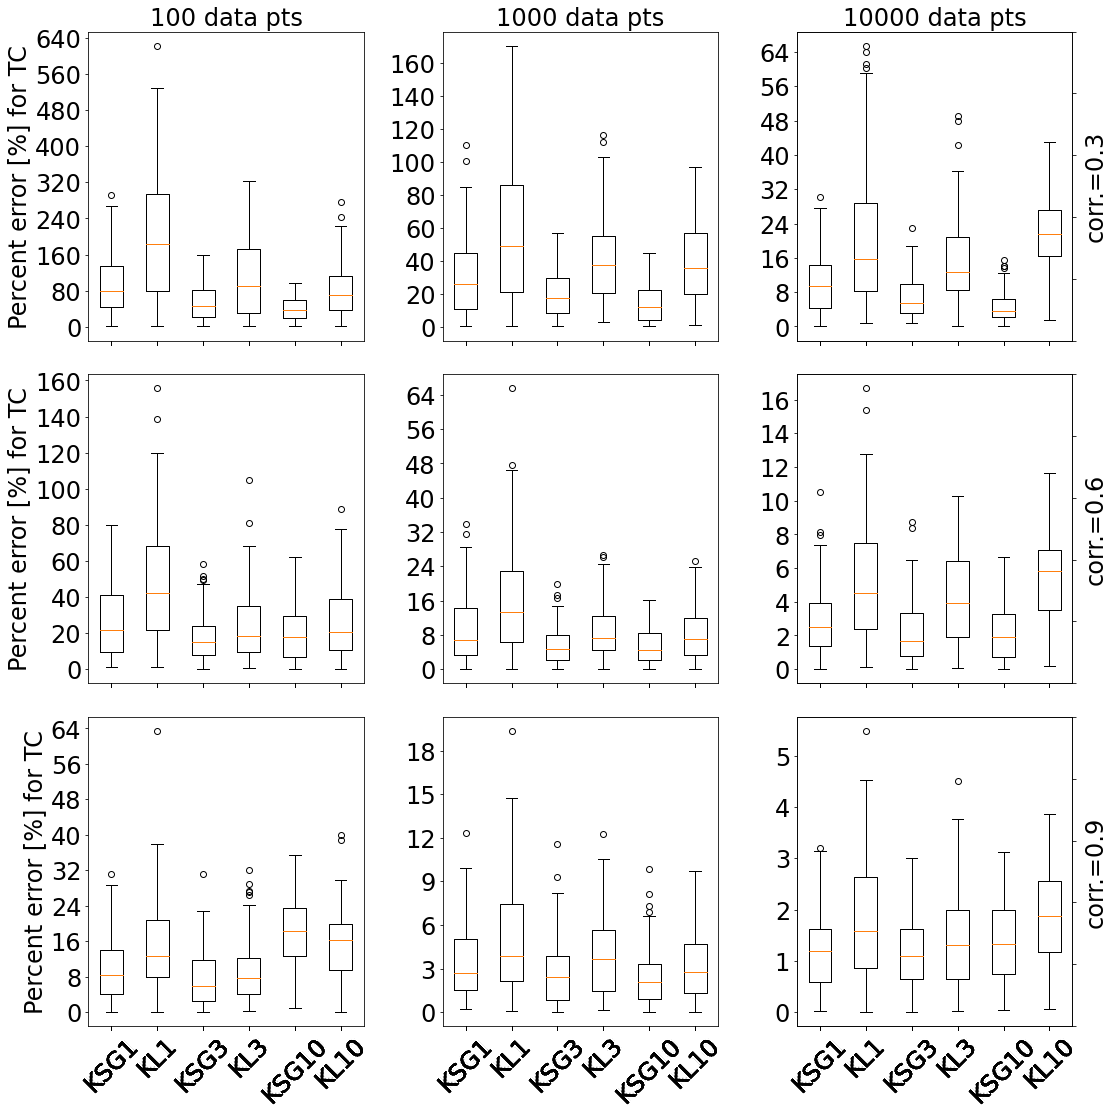

In [25]:
fig, ax = plt.subplots(3,3, sharex=True, sharey=False)

# Initialization 
percent_err_array_knn_KSG1 = np.zeros((len(corr_list),len(Ntot_list),iterations),dtype=float)
percent_err_array_knn_KSG3 = np.zeros((len(corr_list),len(Ntot_list),iterations),dtype=float)
percent_err_array_knn_KSG10 = np.zeros((len(corr_list),len(Ntot_list),iterations),dtype=float)
percent_err_array_knn_KL1 = np.zeros((len(corr_list),len(Ntot_list),iterations),dtype=float)
percent_err_array_knn_KL3 = np.zeros((len(corr_list),len(Ntot_list),iterations),dtype=float)
percent_err_array_knn_KL10 = np.zeros((len(corr_list),len(Ntot_list),iterations),dtype=float)

for c,correlation in enumerate(corr_list):
    for n,Ntot in enumerate(Ntot_list):
        TC_analytical_sol = -1/2 * np.log(1 - 3*correlation**2 + 2*correlation**3)
        
        for iteration in range(iterations):
            k = 1
            percent_err_array_knn_KSG1[c,n,iteration] = abs(TC_analytical_sol - TC_knn_KSG_4d_array[c,n,k-1,iteration]) / TC_analytical_sol * 100
            percent_err_array_knn_KL1[c,n,iteration] = abs(TC_analytical_sol - TC_knn_KL_4d_array[c,n,k-1,iteration]) / TC_analytical_sol * 100
            k = 3
            percent_err_array_knn_KSG3[c,n,iteration] = abs(TC_analytical_sol - TC_knn_KSG_4d_array[c,n,k-1,iteration]) / TC_analytical_sol * 100
            percent_err_array_knn_KL3[c,n,iteration] = abs(TC_analytical_sol - TC_knn_KL_4d_array[c,n,k-1,iteration]) / TC_analytical_sol * 100
            k = 10
            percent_err_array_knn_KSG10[c,n,iteration] = abs(TC_analytical_sol - TC_knn_KSG_4d_array[c,n,k-1,iteration]) / TC_analytical_sol * 100
            percent_err_array_knn_KL10[c,n,iteration] = abs(TC_analytical_sol - TC_knn_KL_4d_array[c,n,k-1,iteration]) / TC_analytical_sol * 100

        ax[c][n].boxplot([percent_err_array_knn_KSG1[c,n,:],percent_err_array_knn_KL1[c,n,:],percent_err_array_knn_KSG3[c,n,:],percent_err_array_knn_KL3[c,n,:],percent_err_array_knn_KSG10[c,n,:],percent_err_array_knn_KL10[c,n,:]],labels=['KSG1','KL1','KSG3','KL3','KSG10','KL10'])
        ax[c][n].yaxis.set_major_locator(MaxNLocator(integer=True))
        #plt.xlabel('Number of bins [#]')
        #plt.title('%i data pts, corr.=%.1f' %(Ntot,correlation))
        ax[0][n].set_title('%i data pts' %Ntot)
        ax[2][n].tick_params(axis='x',labelrotation=45)
        
    ax[c][0].set_ylabel('Percent error [%] for TC'); #plt.ylim(0,1)
    second_y_axis_label = ax[c][n].twinx()
    second_y_axis_label.set_ylabel('corr.=%.1f' %correlation)
    second_y_axis_label.set_yticklabels([])
            
plt.tight_layout()